## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Get the Cycle Power Plant Data Set

In [ ]:
df = pd.read_excel('/content/Folds5x2_pp.xlsx', sheet_name = 'Sheet1')

### (b) Exploring the data

#### i. rows and columns

In [ ]:
df.shape

(9568, 5)

#### ii. pairwise scatterplots of all the varianbles

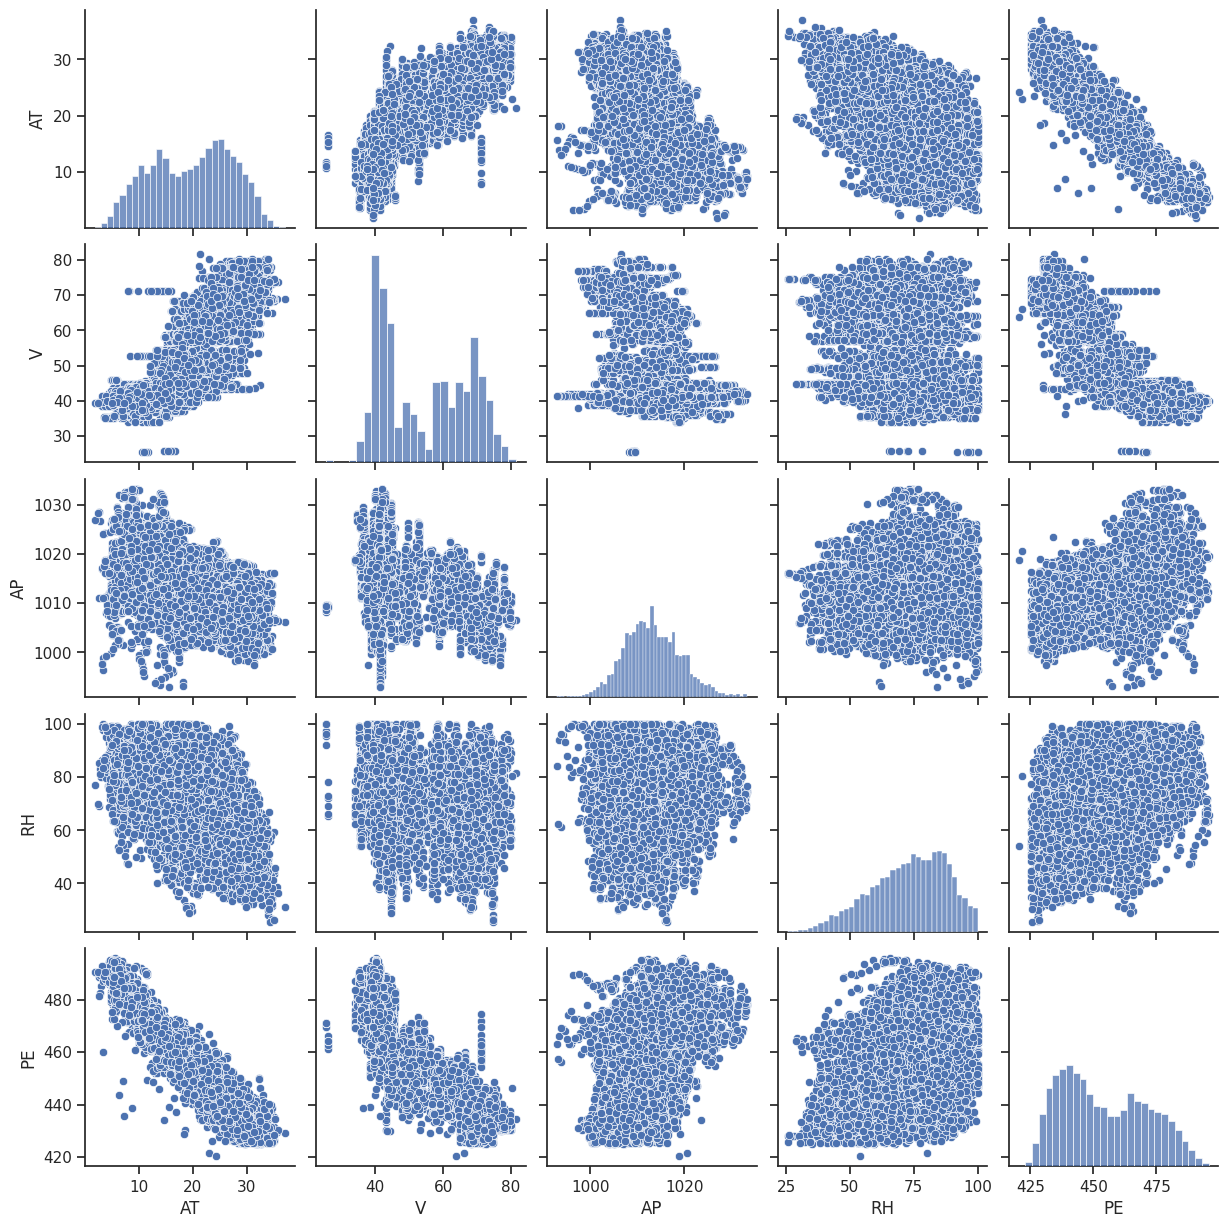

In [ ]:
sns.set(style ="ticks")
sns.pairplot(df)

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [ ]:
#find stats values
mean_val = np.mean(df, axis=0)
median_val = np.median(df, axis=0)
range_val = np.ptp(df, axis=0)
first_quartile_val = np.percentile(df, 25, axis=0)
third_quartile_val = np.percentile(df, 75, axis=0)
iqr_range_val = third_quartile_val - first_quartile_val

#use df to print
sum_stats = pd.DataFrame({
    'Mean': mean_val,
    'Median': median_val,
    'Range': range_val,
    'First Quartile (25%)': first_quartile_val,
    'Third Quartile (75%)': third_quartile_val,
    'Interquartile Range': iqr_range_val
}, index=df.columns)

print(sum_stats)

           Mean    Median  Range  First Quartile (25%)  Third Quartile (75%)  \
AT    19.651231    20.345  35.30               13.5100                 25.72   
V     54.305804    52.080  56.20               41.7400                 66.54   
AP  1013.259078  1012.940  40.41             1009.1000               1017.26   
RH    73.308978    74.975  74.60               63.3275                 84.83   
PE   454.365009   451.550  75.50              439.7500                468.43   

    Interquartile Range  
AT              12.2100  
V               24.8000  
AP               8.1600  
RH              21.5025  
PE              28.6800  


### (c) Simple Linear Regression

Predictor: AT
Coefficient: -2.1713199585178034
Intercept: 497.0341198927665
P-Value: 0.0


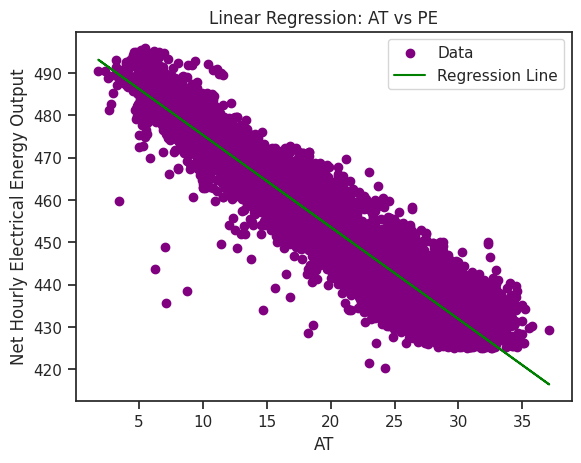

Predictor: AP
Coefficient: 1.4898716733991118
Intercept: -1055.2609889844377
P-Value: 0.0


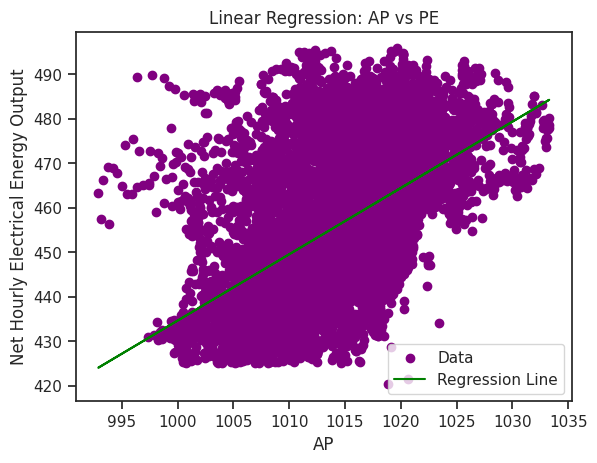

Predictor: RH
Coefficient: 0.4556501022629794
Intercept: 420.9617661554837
P-Value: 0.0


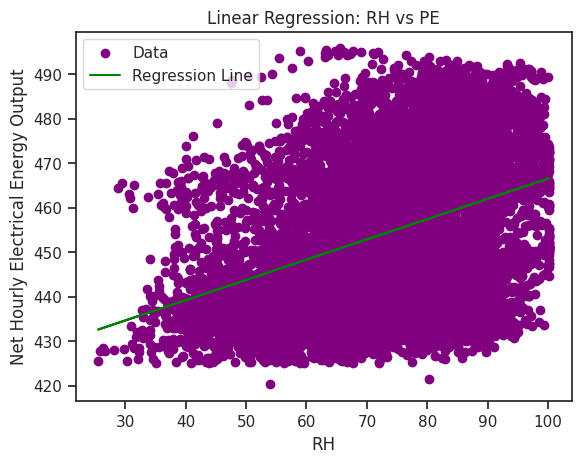

Predictor: V
Coefficient: -1.1681351265557118
Intercept: 517.801526308386
P-Value: 0.0


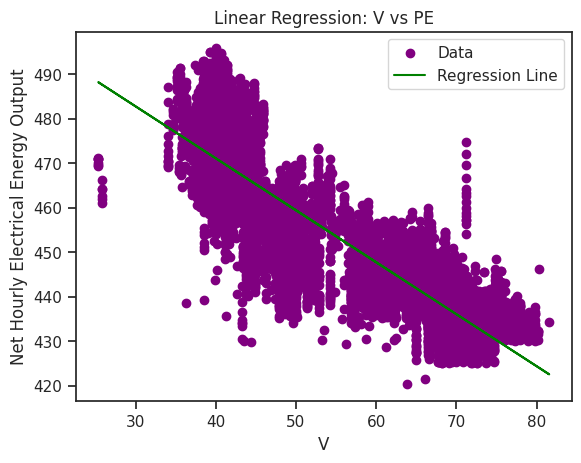

In [ ]:
predictors = ["AT", "AP", "RH", "V"]
dependent = "PE"

#initialize lists to store p values
p_values = []

#loop through predictors to fit model and print stats
for predictor in predictors:
    X = sm.add_constant(df[predictor])
    y = df[dependent]

    #fit model
    model = sm.OLS(y, X).fit()

    #calc stats
    coefficient = model.params[predictor]
    p_value = model.pvalues[predictor]
    p_values.append(p_value)

    #print stats
    print(f"Predictor: {predictor}")
    print("Coefficient:", coefficient)
    print("Intercept:", model.params['const'])
    print("P-Value:", p_value)

    #plot scatterplot
    plt.scatter(df[predictor], y, color='purple', label='Data')
    plt.plot(df[predictor], model.predict(X), color='green', label='Regression Line')
    plt.xlabel(predictor)
    plt.legend()
    plt.ylabel("Net Hourly Electrical Energy Output")
    plt.title(f"Linear Regression: {predictor} vs {dependent}")
    plt.show()

There is a statistically significant association in all the models. No, there are not any outliers I would remove as most points follow the shape of the distribtion and

### (d) Multiple Regression

In [ ]:
X = sm.add_constant(df[predictors])
y = df[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        05:26:21   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

We can reject the null for all predictors.

### (e) 1c Compare to 1d

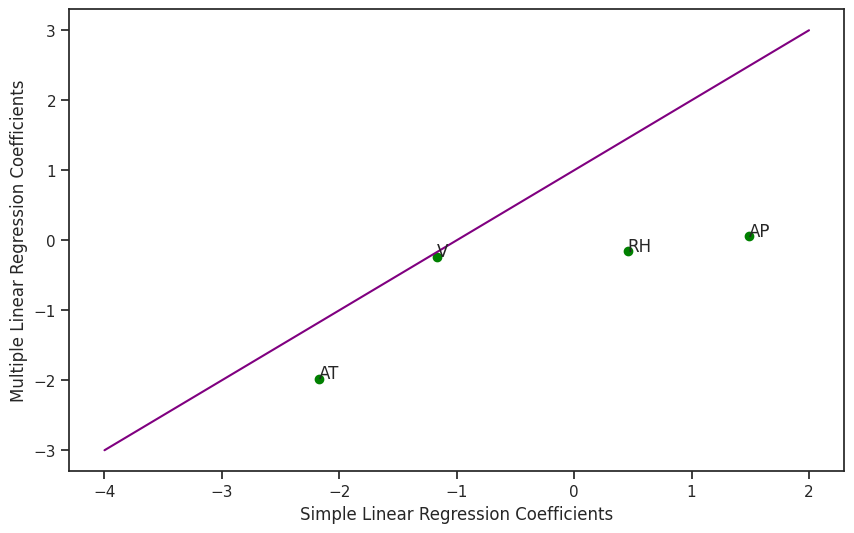

In [ ]:
#gather stats
simple_regression = [-2.1713, 1.4899, 0.4557, -1.1681]
multiple_regression = [-1.9775, 0.0621, -0.1581, -0.2339]

predictors = ["AT", "AP", "RH", "V"]

#plot points
plt.figure(figsize=(10, 6))
plt.scatter(simple_regression, multiple_regression, color='green')

#loop through predictors to plot labels
for p, predictor in enumerate(predictors):
    plt.text(simple_regression[p], multiple_regression[p], predictor)

#plot
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.plot([-4, 2], [-3, 3], color='purple')
plt.show()

### (f) Nonlinear Association

In [ ]:
#loop through columns unless response var
for p in df.columns:
    if p == 'PE':
        break

    #set variables
    X = df[[p]]
    y = df['PE']

    #fit to polynomila
    polynomial = PolynomialFeatures(degree=3)
    X_polynomial = polynomial.fit_transform(X)

    model = LinearRegression()
    sum = model.fit(X_polynomial, y)

    #print stats for each predictor
    print(f"Results for predictor: {p}")
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)

Results for predictor: AT
Intercept: 492.7281433373387
Coefficients: [ 0.         -0.61034571 -0.12513818  0.00267485]
Results for predictor: V
Intercept: 554.1468490634182
Coefficients: [ 0.00000000e+00 -2.14437732e+00 -2.71228490e-03  1.34357110e-04]
Results for predictor: AP
Intercept: 5236219.883027823
Coefficients: [ 0.00000000e+00 -1.54608659e+04  1.52162523e+01 -4.99115986e-03]
Results for predictor: RH
Intercept: 468.41353597124106
Coefficients: [ 0.00000000e+00 -1.72921131e+00  3.21451721e-02 -1.52187969e-04]


### (g) Interactions of Predictors

In [ ]:
formula = 'PE ~ AP + V + RH + AT + I(AT * V) + I(AT * AP) + I(V * AP) + I(AT * RH) + I(V * RH) + I(RH * AP)'

#fit model
model_interaction = smf.ols(formula=formula, data=df)
results = model_interaction.fit()

#print summary and asses p values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:57:23   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

AT and AP, V and RH are the two pairs without statistically significant interaction as the p values > 0.05

### (h) Improvement

In [ ]:
ind = df.iloc[:,:-1]
dep =df.iloc[:,4:]
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.30, random_state=66)

#concat for training set
train_data = pd.concat([X_train, y_train], axis=1)

initial_formula = 'PE ~ AT + V + AP + RH + I(AT * RH) + I(AT * V) + I(AT * AP) + I(V * AP) + I(V * RH) + I(RH * AP) + I(AT ** 2) + I(AP ** 2) + I(RH ** 2) + I(V ** 2)'

#fit model with all features
initial_model = smf.ols(formula=initial_formula, data=train_data)
initial_results = initial_model.fit()

#calculate mse
mse_train_initial = initial_results.mse_resid
pred_test_initial = initial_results.predict(X_test)

features = ['AT', 'V', 'AP', 'RH', 'I(AT * RH)', 'I(AT * V)', 'I(AT * AP)', 'I(V * AP)', 'I(V * RH)', 'I(RH * AP)', 'I(AT ** 2)', 'I(AP ** 2)', 'I(RH ** 2)', 'I(V ** 2)']  # Initial set of selected features

#while more than 1 feature left
while len(features) > 1:

    #fit model
    model = smf.ols(formula=f'PE ~ {" + ".join(features)}', data=train_data)
    results = model.fit()

    #find highest p value and drop correspoding feature
    max_p_value_feature = results.pvalues.drop('Intercept').idxmax()

    #if p val > 0.05 remove it
    if results.pvalues[max_p_value_feature] > 0.05:
        features.remove(max_p_value_feature)  # Remove the feature with the highest p-value
    else:
        break

mse_final = results.mse_resid
print("Initial MSE:", mse_train_initial)
print("Final MSE:", mse_final)
print(results.summary())

Initial MSE: 18.024495213382767
Final MSE: 18.03149467320012
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9205.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:57:26   Log-Likelihood:                -19181.
No. Observations:                6697   AIC:                         3.839e+04
Df Residuals:                    6685   BIC:                         3.847e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### (i) KNN

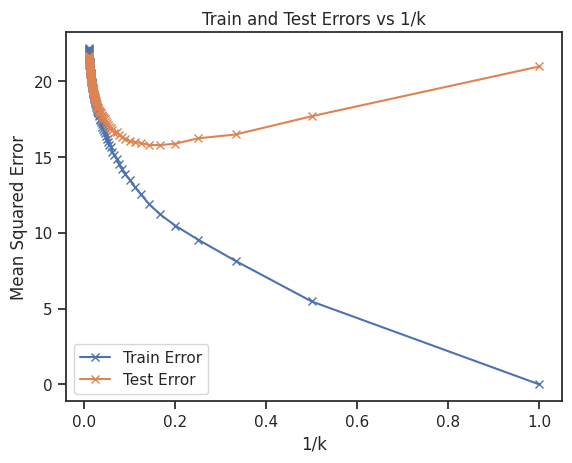

Optimal K for unnormalized data is: 6
Mean squared error: 21.685467489407866


In [ ]:
#create list to hold train and test errors
train_errors = []
test_errors = []

k_range = range(1, 101)

#iterate over k values
for k in k_range:

    #initialize knn regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    #calculate mse
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    #append errors
    train_errors.append(train_error)
    test_errors.append(test_error)

#plot errors
plt.plot(1 / np.array(k_range), train_errors, label='Train Error', marker='x')
plt.plot(1 / np.array(k_range), test_errors, label='Test Error', marker='x')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs 1/k')
plt.legend()
plt.show()

#find optimal k value (with min error) and print k and mse
optimal_k = k_range[np.argmin(test_errors)]
print(f"Optimal K for unnormalized data is: {optimal_k}")
print("Mean squared error:", mean_squared_error(y_test,y_test_pred))

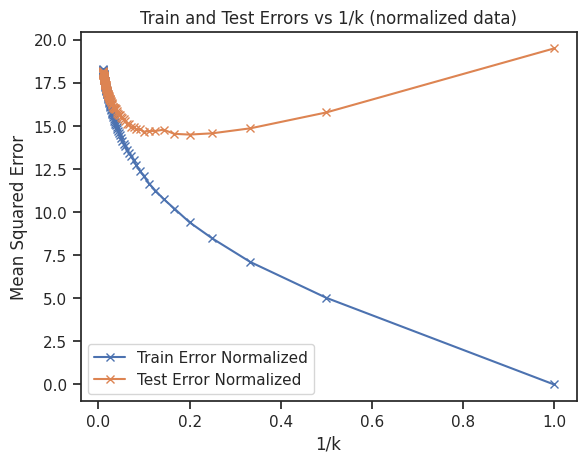

Optimal K for normalized data is: 5
Mean squared error normalized data: 18.179221510982238


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#create list to hold train and test errors
train_errors_norm = []
test_errors_norm = []

k_range_norm = range(1, 101)

#iterate over k values
for k_norm in k_range_norm:

    #initialize regressor
    knn = KNeighborsRegressor(n_neighbors=k_norm)  # Fix here: Use k_norm instead of k
    knn.fit(X_train_normalized, y_train)

    y_train_pred_normalized = knn.predict(X_train_normalized)
    y_test_pred_normalized = knn.predict(X_test_normalized)

    #calculate mse
    train_error_normalized = mean_squared_error(y_train, y_train_pred_normalized)
    test_error_normalized = mean_squared_error(y_test, y_test_pred_normalized)

    #append errors
    train_errors_norm.append(train_error_normalized)
    test_errors_norm.append(test_error_normalized)

#plot errors
plt.plot(1 / np.array(k_range_norm), train_errors_norm, label='Train Error Normalized', marker='x')
plt.plot(1 / np.array(k_range_norm), test_errors_norm, label='Test Error Normalized', marker='x')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs 1/k (normalized data)')
plt.legend()
plt.show()

#find optimal k value (with min error)
optimal_k = k_range_norm[np.argmin(test_errors_norm)]  # Fix here: Use test_errors_norm instead of test_errors
print(f"Optimal K for normalized data is: {optimal_k}")
print("Mean squared error normalized data:", mean_squared_error(y_test,y_test_pred_normalized))

### (j ) Compare KNN and Linear

Linear MSE
all predictors: 18.024
significant predictors: 18.031

KNN MSE
no normalization: 21.51
normalized: 18.18